In [1]:
import pandas as pd
nyc_broutes = pd.read_csv("./dwn_data/nyc_bike-routes.csv")
nyc_1719 = pd.read_csv("./dwn_data/zip-d-1719.csv")
nyc_1921 = pd.read_csv("./dwn_data/zip-d-1921.csv")


In [2]:
ds_1719 = nyc_1719.filter(regex="(Deaths|Other causes)")
lim = ds_1719.columns.get_loc("Other causes")
ds_1719 = ds_1719.iloc[0:,:lim+1]
ds_1719["d_total"] = [row[1].sum() for row in ds_1719.iterrows()]
ds_1719.insert(0, "zip", nyc_1719["ZIP CODE"])
ds_1719["zip"] = ds_1719["zip"].astype("str")

remap_cols = ["zip",
              "d_sept",
              "d_hiv",
              "d_malig_cancer",
              "d_col_cancer",
              "d_panc_cancer",
              "d_lung_cancer",
              "d_br_cancer",
              "d_pros_cancer",
              "d_diabetes",
              "d_psycho",
              "d_alzh",
              "d_hd", 
              "d_renal",
              "d_cereb",
              "d_pnuem",
              "d_respir",
              "d_liv",
              "d_nephros",
              "d_acc",
              "d_sh",
              "d_hom",
              "d_oc",
              "d_total"
              ]

ds_1719.columns = remap_cols

In [37]:
ds_1719

,zip,d_sept,d_hiv,d_malig_cancer,d_col_cancer,d_panc_cancer,d_lung_cancer,d_br_cancer,d_pros_cancer,d_diabetes,...,d_cereb,d_pnuem,d_respir,d_liv,d_nephros,d_acc,d_sh,d_hom,d_oc,d_total
0,10001,NaN,NaN,104.0,12.0,11.0,21.0,11.0,5.0,12.0,...,11.0,11.0,19.0,NaN,NaN,8.0,6.0,NaN,90.0,444.0
1,10002,11.0,NaN,434.0,39.0,29.0,96.0,24.0,19.0,58.0,...,84.0,74.0,66.0,5.0,27.0,46.0,25.0,NaN,394.0,2174.0
2,10003,NaN,6.0,185.0,14.0,22.0,50.0,11.0,10.0,12.0,...,16.0,19.0,29.0,NaN,NaN,14.0,12.0,NaN,129.0,741.0
3,10004,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,11.0
4,10005,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,11691,8.0,6.0,283.0,29.0,29.0,60.0,27.0,17.0,81.0,...,52.0,54.0,74.0,14.0,9.0,22.0,15.0,8.0,244.0,1752.0
180,11692,11.0,6.0,89.0,7.0,5.0,13.0,15.0,8.0,28.0,...,12.0,27.0,28.0,6.0,NaN,NaN,NaN,NaN,80.0,555.0
181,11693,NaN,NaN,55.0,13.0,NaN,9.0,7.0,NaN,6.0,...,9.0,NaN,12.0,NaN,NaN,7.0,NaN,NaN,30.0,224.0
182,11694,NaN,5.0,121.0,12.0,NaN,24.0,8.0,9.0,18.0,...,11.0,20.0,38.0,8.0,7.0,10.0,NaN,NaN,103.0,646.0


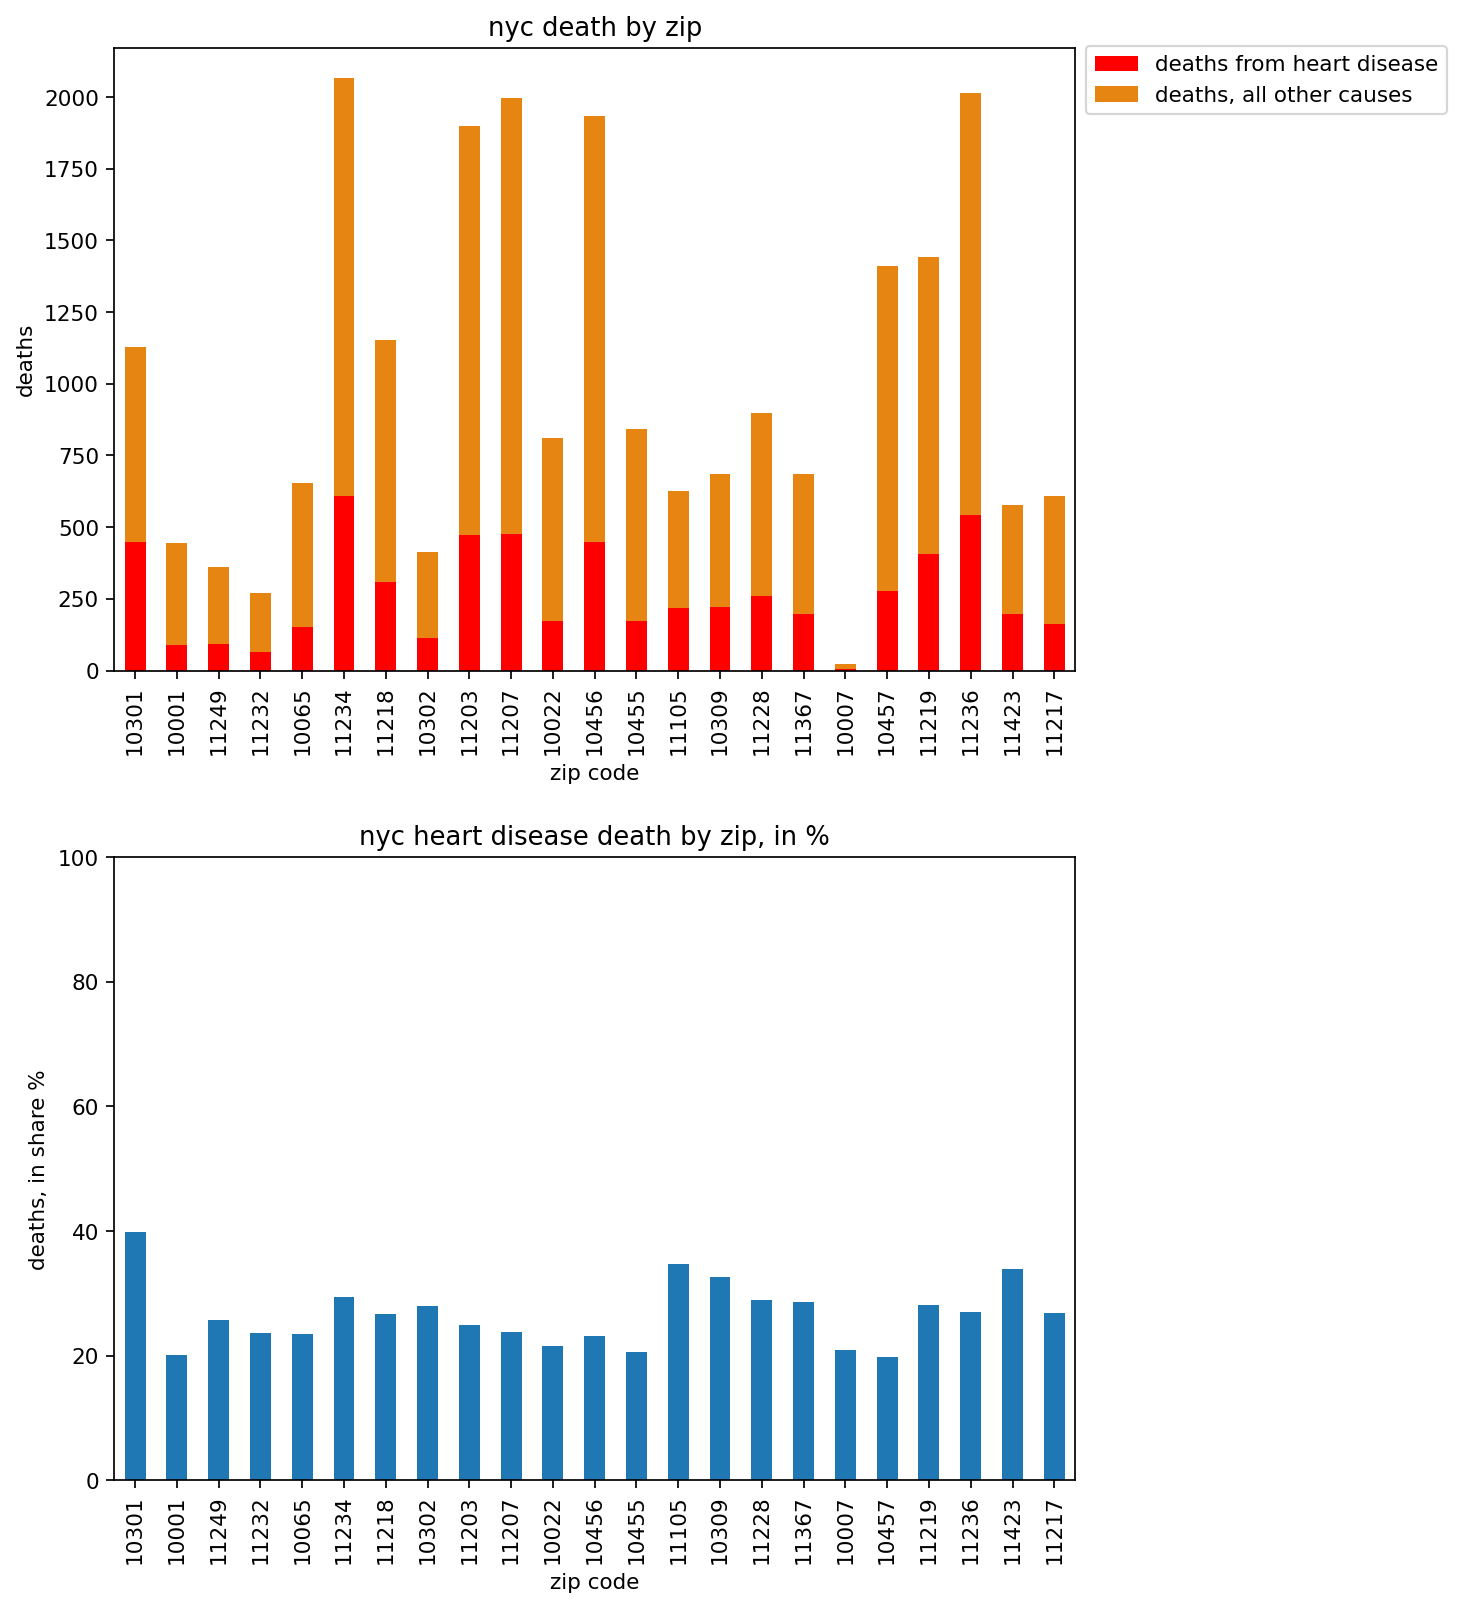

In [4]:
import matplotlib.pyplot as plt 

smpl_1719 = ds_1719.sample(n=23) # to grab 1/8 of data
dte = (smpl_1719["d_total"] - smpl_1719["d_hd"])
dp = ((smpl_1719["d_hd"] / smpl_1719["d_total"]) * 100)
smpl_1719.insert(smpl_1719.shape[1], "d_tot_ex_hd", dte)
smpl_1719.insert(smpl_1719.shape[1], "d_hd_p", dp)

f_width = 8
f_height = 12
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(f_width, f_height), dpi=155)

splot = smpl_1719.plot.bar(
    ax=axes[0],
    stacked=True,
    x="zip",
    y=["d_hd","d_tot_ex_hd"],
    xlabel="zip code",
    ylabel="deaths",
    title="nyc death by zip",
    label=["deaths from heart disease", "deaths, all other causes"],
    color=["red", "#e78513"]
    )
splot.legend(bbox_to_anchor=(1, 1.02))

splt_p = smpl_1719.plot.bar(
    ax=axes[1],
    x="zip",
    y="d_hd_p",
    xlabel="zip code",
    ylabel="deaths, in share %",
    ylim=[0,100],
    title="nyc heart disease death by zip, in %",
    legend=False,
)

plt.subplots_adjust(hspace=.3)
plt.show()

# Borough building

In [6]:
geocodio_file = open("geocodio_key.txt", "r") 
geocodio_content = geocodio_file.read().split("\n")

gc_key = geocodio_content[0]

In [7]:
from geocodio import GeocodioClient
client = GeocodioClient(gc_key)

In [59]:
bor_ids = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
city_bor = {
            "New York": "Manhattan",
            "Staten Island": "Staten Island", 
            "Bronx": "Bronx",
            "Brooklyn": "Brookyln"
           }

county_bor = {
              "Queens County": "Queens",
              "New York County": "Manhattan",
              "Bronx County" : "Bronx"
             }

def dec_borough(city, county): 
    
    borough = "err" 
    try: 
        borough = city_bor[city]
    except: 
        try: 
            borough = county_bor[county]
        except: 
            borough = "err_r"

    return borough

In [60]:
zip_by_borough = []

for row in ds_1719.iterrows(): 
    zip = row[1]["zip"]
    bor_loc = client.geocode(zip)
    z_city = bor_loc.get("results")[0]["address_components"]["city"]
    z_county = bor_loc.get("results")[0]["address_components"]["county"]

    bor = dec_borough(z_city, z_county)
    zip_by_borough.append(bor)


In [64]:
zip_by_borough.index("err_r"), ds_1719.iloc[83]

(83,
 zip               11001
 d_sept              NaN
 d_hiv               NaN
 d_malig_cancer     15.0
 d_col_cancer        NaN
 d_panc_cancer       NaN
 d_lung_cancer       NaN
 d_br_cancer         NaN
 d_pros_cancer       NaN
 d_diabetes          NaN
 d_psycho            NaN
 d_alzh              NaN
 d_hd               21.0
 d_renal             NaN
 d_cereb             NaN
 d_pnuem             NaN
 d_respir            NaN
 d_liv               NaN
 d_nephros           NaN
 d_acc               NaN
 d_sh                NaN
 d_hom               NaN
 d_oc               14.0
 d_total            50.0
 Name: 83, dtype: object)

In [55]:
ds_1719.iloc[38]

zip               10065
d_sept              NaN
d_hiv               NaN
d_malig_cancer    173.0
d_col_cancer       14.0
d_panc_cancer      12.0
d_lung_cancer      28.0
d_br_cancer        18.0
d_pros_cancer       7.0
d_diabetes          6.0
d_psycho            NaN
d_alzh             25.0
d_hd              153.0
d_renal             9.0
d_cereb            17.0
d_pnuem            16.0
d_respir           28.0
d_liv               NaN
d_nephros           5.0
d_acc               9.0
d_sh                9.0
d_hom               NaN
d_oc              125.0
d_total           654.0
Name: 38, dtype: object

## ZIP Code Building

In [8]:
on_location = client.geocode("3rd AV BR, Manhattan, NY")
on_acc = on_location.accuracy
on_zip = int(on_location.formatted_address.split(" ")[-1])
print(on_zip, on_acc)

10065 0.9


In [9]:
from_loc = client.geocode("E 135th ST, Manhattan, NY")
from_acc = from_loc.accuracy
from_zip = int(from_loc.formatted_address.split(" ")[-1])
print(from_zip, from_acc)

10001 0.5


In [10]:
to_loc = client.geocode("Lexignton AV, Manhattan, NY")
to_acc = to_loc.accuracy
to_zip = int(to_loc.formatted_address.split(" ")[-1])
print(to_zip, to_acc)

10001 0.5


## Attribution of Faulty Data

In [11]:
def mod(row, cols):
  rw = row[1]
  avg = 0 
  avg_dist = 0
  iters = 0 
  length = len(cols)
  for i in range(length):
      if not pd.isna(rw[cols[i]]):
          avg += rw[cols[i]]
          j = i + 1
          while j < length:  
              if not pd.isna(rw[cols[j]]):
                  avg_dist += abs(rw[cols[i]] - rw[cols[j]])
                  iters += 1
              j += 1
  margin_of_dif = pd.NA
  if (avg):
      avg = avg / length
      avg_dist = avg_dist / iters
      margin_of_dif = (avg_dist / avg) * 100
  return margin_of_dif

In [12]:
eds_1719 = nyc_1719.filter(regex="(Deaths|Other causes)")
emd_1719 = eds_1719.filter(regex="Male")
efd_1719 = eds_1719.filter(regex="Female")

mdt_cause = [row[1].sum() for row in emd_1719.iterrows()]
fdt_cause = [row[1].sum() for row in efd_1719.iterrows()]
dt_cause_sx = [(mdt_cause[i] + fdt_cause[i]) for i in range(len(mdt_cause))]

dt_sx = [(nyc_1719.loc[i, "Male"] + nyc_1719.loc[i, "Female"]) for i in range(nyc_1719.shape[0])]


In [13]:
dc_1719 = {"zip": nyc_1719["ZIP CODE"],
           "md, r": nyc_1719["Male"],
           "md, sb_c": mdt_cause,
           "fd, r": nyc_1719["Female"],
           "fd, sb_c": fdt_cause,
           "td, sb_gr": dt_sx,
           "td, sb_gc": dt_cause_sx,
           "td, sb_c": ds_1719["d_total"][:-1]
          }
dct_1719 = pd.DataFrame(dc_1719)

In [14]:
dct_1719.head()

,zip,"md, r","md, sb_c","fd, r","fd, sb_c","td, sb_gr","td, sb_gc","td, sb_c"
0,10001,206.0,204.0,194.0,216.0,400.0,420.0,444.0
1,10002,948.0,1048.0,1025.0,1121.0,1973.0,2169.0,2174.0
2,10003,314.0,352.0,328.0,375.0,642.0,727.0,741.0
3,10004,11.0,0.0,9.0,0.0,20.0,0.0,11.0
4,10005,18.0,6.0,NaN,0.0,NaN,6.0,7.0


In [15]:
dct_1719.insert(3, "md, dif in %", [mod(row, ["md, r", "md, sb_c"]) for row in dct_1719.iterrows()])
dct_1719.insert(6, "fd, dif in %", [mod(row, ["fd, r", "fd, sb_c"]) for row in dct_1719.iterrows()])
dct_1719.insert(10, "td, dif in %", [mod(row, ["td, sb_gr", "td, sb_gc", "td, sb_c"]) for row in dct_1719.iterrows()])

dct_1719["md, dif in %"] = pd.to_numeric(dct_1719["md, dif in %"], errors='coerce')
dct_1719["fd, dif in %"] = pd.to_numeric(dct_1719["fd, dif in %"], errors='coerce')
dct_1719["td, dif in %"] = pd.to_numeric(dct_1719["td, dif in %"], errors='coerce')

In [16]:
dct_1719.loc["avg"] = dct_1719.mean()
dct_1719.loc["avg", "zip"] = pd.NA
dct_1719 = dct_1719.round(2)

pe_1719 = dct_1719.filter(regex="%|zip")
pes_1719 = pe_1719.sample(n=23)

In [17]:
pes_1719.head()

,zip,"md, dif in %","fd, dif in %","td, dif in %"
181,11693.0,19.43,2.47,6.85
169,11426.0,2.96,10.07,6.63
98,11206.0,10.82,9.92,7.08
117,11225.0,10.42,11.74,8.16
20,10024.0,10.58,12.04,8.05


<Axes: ylabel='difference, in %'>

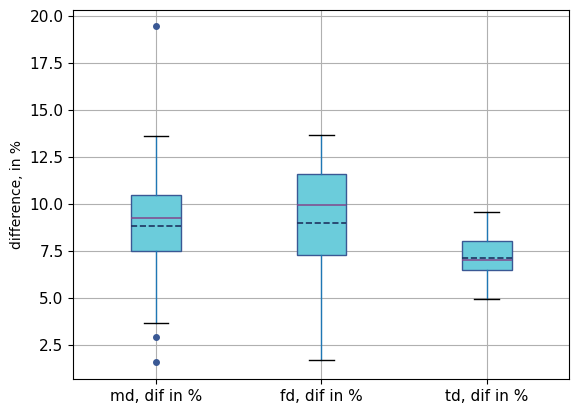

In [18]:
pes_1719.boxplot(
    column=["md, dif in %", "fd, dif in %", "td, dif in %"],
    fontsize=11,
    ylabel="difference, in %",
    meanline=True,
    showmeans=True,
    patch_artist=True,
    medianprops={'color': '#82468c', 'linewidth': 1.1},
    meanprops={'color': "#1e3461", 'linewidth': 1.2},
    boxprops={"facecolor":'#6bccdb', "edgecolor":'#3a5894'},
    flierprops={'marker': 'o', 'markerfacecolor': '#3a5894', 'markersize': 4, 'markeredgecolor': '#3a5894'},
)